# Inaugural Project

Imports and set magics: 


In [128]:
import numpy as np
## autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import itertools as it
import scipy
from scipy import optimize 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [129]:
# We define the variables, where we set w=1, in order to try the code.
m = 1
v = 10
epsilon = 0.3
tau_0 = 0.4
tau_1 = 0.1
kappa = 0.4
w = 1

# We define the utility function for the consumer:
def utility(c,l,v,epsilon):
    u = np.log(c) - v*(l**(1+(1/epsilon))/(1+(1/epsilon)))
    return u

# We define the constraint
def constraint(m,w,l,tau_0,tau_1,kappa):
    x = m + w*l - (tau_0*w*l + tau_1*max(w*l-kappa,0))
    return x

# We define the consumption choice as a function of the constraint
def choice(l,w,epsilon,v,tau_0,tau_1,kappa,m):
    c = constraint(m,w,l,tau_0,tau_1,kappa)
    return -utility(c,l,v,epsilon)

# We define the function in order to determine the laboursupply and consumption optimizing output
def optimizer(w,epsilon,v,tau_0,tau_1,kappa,m,do_print=False):
    result = optimize.minimize_scalar(choice, method='bounded',bounds=(0,1), args=(w,epsilon,v,tau_0,tau_1,kappa,m))
    
    l_opt = result.x
    c_opt = constraint(m,w,l_opt,tau_0,tau_1,kappa)
    u_opt = utility(c_opt,l_opt,v,epsilon)
    
    if do_print:
        print(f'l_opt = {l_opt:3f}')
        print(f'c_opt = {c_opt:3f}')
        print(f'u_opt = {u_opt:3f}')
    return l_opt,c_opt,u_opt

# Question 2

In [130]:
#We run the optimization with w=1 to find the average parameters.
optimizer(w,epsilon,v,tau_0,tau_1,kappa,m,do_print=True)

l_opt = 0.400001
c_opt = 1.240000
u_opt = 0.171583


(0.4000006819648219, 1.240000340982411, 0.17158308392555602)

In [131]:
l_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[0]
print(l_opt)
c_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[1]
print(c_opt)
u_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[2]
print(u_opt)

0.4000006819648219
1.240000340982411
0.17158308392555602


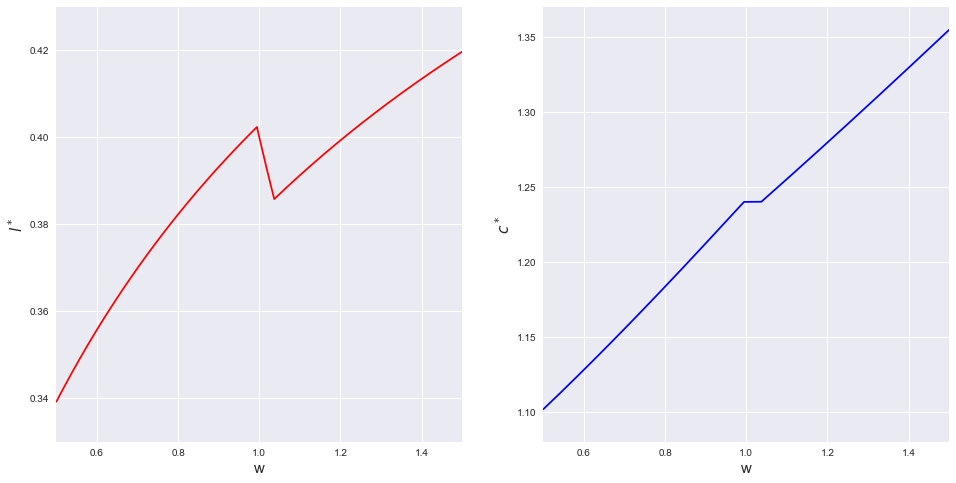

In [132]:
#We set the population to 10.000:
N=10000
#We create a vector for all values between 0.5-1.5 for the 10.0000 people:
w_vec = np.linspace(0.5, 1.5, N)
#Then we create to empty vectors for l and c in the same size:
l_vec = np.empty(N)
c_vec = np.empty(N)
#Then we run our optimizer code with the different w

for i,w in enumerate(w_vec) :
    bundle = optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

fig = plt.figure(figsize=(16,8))
ax=ax = fig.add_subplot(1,2,1)
ax.plot(w_vec, l_vec, color='red')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$l^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([0.33,0.43])
ax.grid(True)

ax=ax = fig.add_subplot(1,2,2)
ax.plot(w_vec, c_vec, color='blue')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$c^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([1.08,1.37])
ax.grid(True)

We notice that optimal supply of labor and consumption are positive functions of the wage. So a higher wages lead to higher consumption and higher supply of consumption. We can conclude that the substitution effect dominates the income effect in the labor market. Furthermore the discontinous jumps in both of the plots are when the max function takes the first input instead of the second, so when the consumer goes from the standard labor income tax, to the top bracket and now has to pay top bracket labor income tax. 

# Question 3

In [178]:
N=10000
#We define a function for the tax revenue 
def Tax_revenue(epsilon,v,tau_0,tau_1,kappa,m,N):
    np.random.seed(1032)
    wi_vec1 = np.random.uniform(0.5,1.5,size=N)
    l_vec1 = np.empty(N)
    for i,w in enumerate(wi_vec1) :
        OPT = optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)
        l_vec1[i]=OPT[0]

    total_tax = lambda l_vec1,wi_vec1: tau_0 * wi_vec1 * l_vec1 + tau_1 * (max(wi_vec1[i]*l_vec1[i]-kappa,0))
    tax=total_tax(l_vec1,wi_vec1)
    return np.sum(tax)

In [179]:
print(f'The total tax revenue is: {Tax_revenue(epsilon,v,tau_0,tau_1,kappa,m,N):4f}')

The total tax revenue is: 1575.528561


# Question 4

In [180]:
epsilon1=0.1
print(f'The total tax revenue is: {Tax_revenue(epsilon1,v,tau_0,tau_1,kappa,m,N):4f}')

The total tax revenue is: 3187.029753


The tax revenue increases due to $\epsilon$ being the elasticity of labour supply. When epsilon is lowered we get more labour supply which results in higher tax revenue.

# Question 5

In [183]:
N1=10000 # Note this code takes a few mintues to run, but you can set the population to 100 and increase the revenue with a factor 100 to run the code faster
# We define the function to optimize tax_revenu
def Tax_Revenue_Optimizer(x):
    tau_0 = x[0]
    tau_1 = x[1]
    kappa = x[2]
    return -Tax_revenue(epsilon,v,tau_0,tau_1,kappa,m,N1)

# We set the bounds and start with the given parameter values
Bounds_Tax_Revenue=((0,1),(0,1),(0,1.5))
Guess =[0.4,0.1,0.1]

# We use the solver to maximize tax revenu given the three parameters
Result_Tax_Revenue_Optimizer = optimize.minimize(Tax_Revenue_Optimizer, Guess, method='SLSQP',bounds=Bounds_Tax_Revenue)

# We find the optimal parameters 
tau_0_opt=Result_Tax_Revenue_Optimizer.x[0]
tau_1_opt=Result_Tax_Revenue_Optimizer.x[1]
kappa_opt=Result_Tax_Revenue_Optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal tau_0 is {tau_0_opt:.3f}')
print(f'Optimal tau_1 is {tau_1_opt:.3f}')
print(f'Optimal kappa is {kappa_opt:.3f}')
print(f'This gives us the expected tax revenue for N1 people: {Tax_revenue(epsilon,v,tau_0_opt,tau_1_opt,kappa_opt,m,N1):.3f}, which is significantly higher than the tax revenue of around 1500 in 3)')

Optimal tau_0 is 0.785
Optimal tau_1 is 0.000
Optimal kappa is 0.000
This gives us the expected tax revenue for N1 people: 2463.400, which is significantly higher than the tax revenue of around 1500 in 3)


We end up with a standard labour income tax level, $\tau_0$, around 78,5%, while removing the the top bracket labor income tax, $\tau_1$, as the optimal descision. This makes $\kappa=0$ optimal, since the cut of for the top income bracket is unnecessary since $\tau_1$ is zero. We thus suggest to the politician to remove the top brakcet income in order to give the labour force a initiative to work hard without a taxation punishment. 

# Conclusion

In our project we created a code which is able to solve the Labor-Supply Problem, whereas it optimizes the specified maximization problem. The optimal choices of labor and consumption are found and plotted in two graphs. These optimal choices are used to calculate the tax revenue for a given population with the specified functions and for individuals solving the optimization problem. The effect of a change in the Frisch elasticity of labor supply have significantly impact on the tax revenue. Finally the tax revenue is maximized yielding the optimal choices of values for the standar labor income, $\tau_0 = 78.5%$, and top bracket labor income tax, $\tau_1 = 0%$, and the cut-off for the top labor income bracket, $\kappa = 0%$. Resulting in removing the top bracket labour income thus incentivising the workers to work hard. 